In [58]:
import numpy as np
import tensorflow as tf

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [53]:
def get_attn_mask(n, attn_mode, local_attn_ctx=None):
    if attn_mode == 'all':
        b = tf.linalg.band_part(tf.ones([n, n]), -1, 0)
    elif attn_mode == 'local':
        bandwidth = local_attn_ctx
        ctx = tf.minimum(n - 1, bandwidth - 1)
        b = tf.linalg.band_part(tf.ones([n, n]), ctx, 0)
    elif attn_mode == 'strided':
        stride = local_attn_ctx
        x = tf.reshape(tf.range(n, dtype=tf.int32), [n, 1])
        y = tf.transpose(x)
        z = tf.zeros([n, n], dtype=tf.int32)
        q = z + x
        k = z + y
        c1 = q >= k
        c2 = tf.equal(tf.math.floormod(q - k, stride), 0)
        c3 = tf.logical_and(c1, c2)
        b = tf.cast(c3, tf.float32)
    else:
        raise ValueError('Not yet implemented')
    b = tf.reshape(b, [1, 1, n, n])
    return b

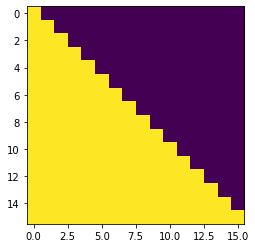

In [44]:
m = get_attn_mask(n=16, attn_mode='all', local_attn_ctx=4)

plt.imshow(m[0,0,:,:].numpy())

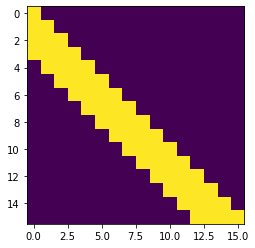

In [50]:
m = get_attn_mask(n=16, attn_mode='local', local_attn_ctx=4)

plt.imshow(m[0,0,:,:].numpy())

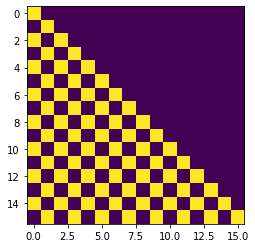

In [57]:
m = get_attn_mask(n=16, attn_mode='strided', local_attn_ctx=2)

plt.imshow(m[0,0,:,:].numpy())